In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/tata steel.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-03-2023,105.099998,105.400002,104.300003,104.750000,101.439201,26434897
1,22-03-2023,104.750000,105.949997,104.400002,104.800003,101.487625,25891259
2,23-03-2023,104.400002,105.500000,104.349998,104.900002,101.584465,20913844
3,24-03-2023,105.000000,105.050003,101.550003,102.099998,98.872955,39014278
4,27-03-2023,102.550003,103.400002,102.099998,102.300003,99.066643,24753289


In [ ]:
series_shifted=df['Close'].shift()
df['previous_close']= series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,previous_close
0,21-03-2023,105.099998,105.400002,104.300003,104.750000,101.439201,26434897,NaN
1,22-03-2023,104.750000,105.949997,104.400002,104.800003,101.487625,25891259,104.750000
2,23-03-2023,104.400002,105.500000,104.349998,104.900002,101.584465,20913844,104.800003
3,24-03-2023,105.000000,105.050003,101.550003,102.099998,98.872955,39014278,104.900002
4,27-03-2023,102.550003,103.400002,102.099998,102.300003,99.066643,24753289,102.099998


In [ ]:
df.shape

(247, 8)

In [ ]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
previous_close    1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,previous_close
1,22-03-2023,104.750000,105.949997,104.400002,104.800003,101.487625,25891259,104.750000
2,23-03-2023,104.400002,105.500000,104.349998,104.900002,101.584465,20913844,104.800003
3,24-03-2023,105.000000,105.050003,101.550003,102.099998,98.872955,39014278,104.900002
4,27-03-2023,102.550003,103.400002,102.099998,102.300003,99.066643,24753289,102.099998
5,28-03-2023,102.849998,103.099998,102.349998,102.500000,99.260315,18703734,102.300003
...,...,...,...,...,...,...,...,...
242,15-03-2024,142.899994,143.699997,139.850006,141.699997,141.699997,68482621,142.449997
243,18-03-2024,142.550003,150.250000,142.199997,149.699997,149.699997,166913078,141.699997
244,19-03-2024,149.000000,152.449997,147.600006,148.750000,148.750000,105004268,149.699997
245,20-03-2024,149.600006,150.649994,143.850006,145.649994,145.649994,77550319,148.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1 to 246
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            246 non-null    object 
 1   Open            246 non-null    float64
 2   High            246 non-null    float64
 3   Low             246 non-null    float64
 4   Close           246 non-null    float64
 5   Adj Close       246 non-null    float64
 6   Volume          246 non-null    int64  
 7   previous_close  246 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,previous_close
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,123.629675,124.774187,122.190041,123.443292,122.599182,3.677710e+07,123.258943
std,13.151374,13.417201,12.563708,12.977699,14.040407,1.960417e+07,12.919462
min,102.500000,103.099998,101.550003,102.099998,98.872955,1.471945e+07,102.099998
25%,111.699998,113.075001,111.287500,112.100000,110.638939,2.421679e+07,111.699998
50%,122.875000,123.724998,121.125000,123.000000,123.000000,3.139930e+07,122.500000
75%,133.249996,134.787502,131.249996,131.987499,131.987499,3.954378e+07,131.924999
max,158.899994,159.149994,153.000000,157.250000,157.250000,1.669131e+08,157.250000


<Axes: >

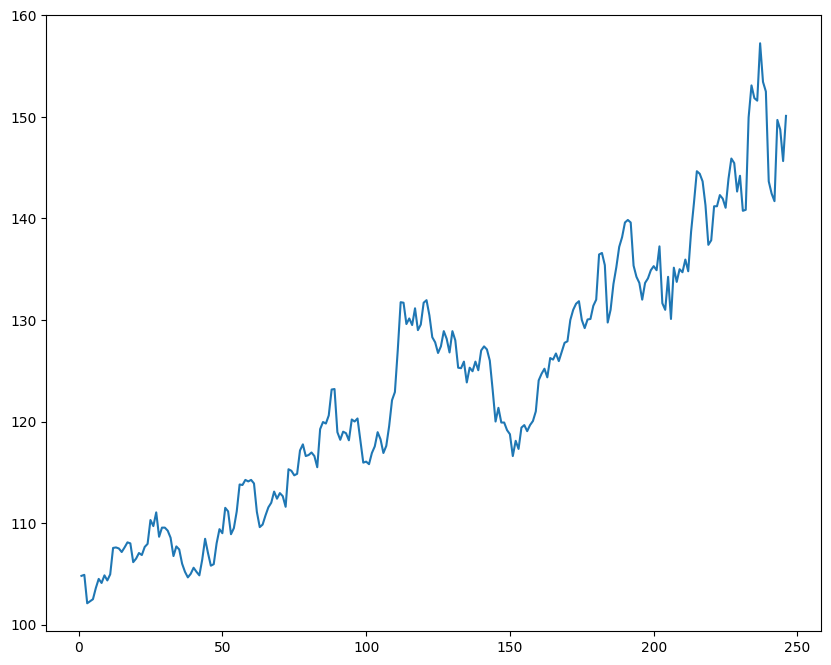

In [ ]:
df['Close'].plot(figsize=(10,8))

In [ ]:
x=df[['Open','previous_close','High', 'Low']]
y=df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape, x_test.shape)

(184, 4) (62, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.59402602  0.05456646  0.79884353  0.74241155]
-0.23361650747696672


In [ ]:
predicted= regressor.predict(x_test)
print(x_test)

           Open  previous_close        High         Low
90   122.900002      123.199997  122.900002  118.250000
109  120.500000      119.550003  122.699997  120.250000
75   115.150002      115.150002  116.050003  114.000000
110  122.849998      122.099998  123.599998  122.150002
72   112.000000      112.650002  113.300003  111.250000
..          ...             ...         ...         ...
159  120.849998      120.050003  121.250000  119.900002
174  132.500000      131.600006  133.399994  130.800003
108  118.500000      117.599998  120.150002  117.750000
117  129.500000      129.500000  131.850006  129.199997
161  124.000000      124.050003  125.250000  123.000000

[62 rows x 4 columns]


In [ ]:
predicted.shape

(62,)

In [ ]:
_df= pd.DataFrame({"Actual":y_test, "Predicted": predicted})
print(_df)

         Actual   Predicted
90   118.949997  119.451211
109  122.099998  122.002758
75   114.699997  114.988326
110  122.900002  122.875485
72   111.599998  112.484642
..          ...         ...
159  121.000000  120.403970
174  131.850006  131.912039
108  119.550003  119.191329
117  131.149994  131.153466
161  124.699997  124.247901

[62 rows x 2 columns]


In [ ]:
regressor.score(x_test,y_test)

0.9976316513315155

In [ ]:
import math
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test,predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error 0.48655410656875947
Mean Square Error 0.3698456423055669
Root Mean Error 0.6081493585506499


In [ ]:
predicted=regressor.predict(x)
print(predicted)

[105.40323267 105.21726834 102.42808468 102.82089034 102.5995457
 103.41706417 104.609771   104.17704887 104.10408593 104.52178557
 105.44438584 106.97641183 107.35694735 106.79625253 107.48227024
 107.45548455 109.75920245 107.96069661 106.07279152 105.80390237
 107.03192755 106.44441663 107.52546623 107.93974204 110.23427485
 109.96989454 111.09412036 109.00742436 108.91669848 110.50451029
 109.13757112 108.69954769 107.02544915 106.87151637 107.75044577
 106.06564768 105.91019657 104.46331231 104.61584114 105.73430097
 105.49309018 104.60590785 106.30758257 107.88393864 107.36278041
 106.23832601 106.41590608 107.86551661 108.94350699 108.69773312
 110.78766343 112.25652194 109.59995026 110.25704604 111.15462508
 113.37035623 113.62251998 114.24753485 113.69623903 114.54447782
 113.31527707 111.98606878 109.7321031  108.9288597  110.90892094
 111.41958127 111.15244915 113.65349724 112.50729877 113.04928355
 112.3271306  112.48464163 114.49302591 115.36307147 114.98832613
 115.549010

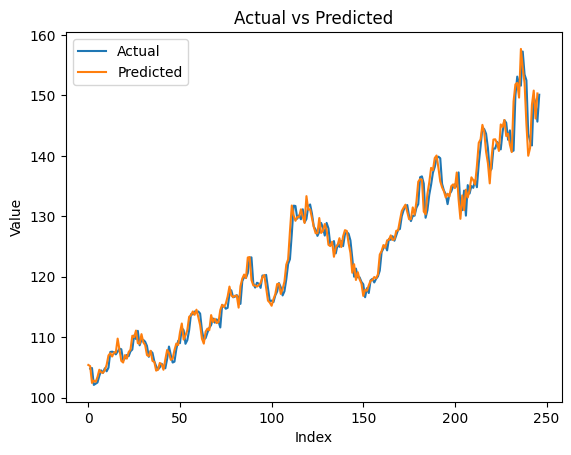

In [ ]:
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
regressor.predict([[150,150.1,160,150]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([158.02960515])

In [ ]:
150*(-0.59402602)+150.1*(0.05456646)+160*(0.79884353)+150*(0.74241155)-0.23361650747696672

158.02960343852303